<h1>Load network data exported from cytoscape</h1>

In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
basedir = '../..'
sys.path.append(basedir)

import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt

import matplotlib as mpl
import matplotlib.cm as cm

from IPython.display import display
from lda_for_fragments import Ms2Lda
from visualisation.networkx.lda_visualisation import *

# get rid of annoying warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import csv
import networkx as nx
G = nx.Graph()

In [49]:
node_labels = {}
with open("Ferulic_acid_nodes.csv", "rb") as infile:
    reader = csv.reader(infile)
    next(reader, None)  # skip the headers
    for row in reader:        
        node_id = float(row[0])
        beer3_presence = float(row[12])
        ms1_mean_mass = float(row[19])
        ms1_mean_rt = float(row[23])
        ms1_stderr_rt = float(row[24])
        if beer3_presence > 0:
            G.add_node(node_id)
            G.node[node_id]['mass'] = ms1_mean_mass
            G.node[node_id]['rt'] = ms1_mean_rt
            G.node[node_id]['stderr_rt'] = ms1_stderr_rt   
            node_labels[node_id] = ms1_mean_mass

In [50]:
print nx.info(G)
nodes = G.nodes(data=True)
node_ids = []
for node_id, node_data in nodes:
    print node_id, node_data
    node_ids.append(node_id)

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 0
Average degree:   0.0000
3017.0 {'rt': 526.920333333, 'stderr_rt': 1.5187542044, 'mass': 424.256}
2442.0 {'rt': 556.8784375, 'stderr_rt': 48.5737621548, 'mass': 307.163}
3215.0 {'rt': 269.987, 'stderr_rt': 13.6409356534, 'mass': 540.271}
2131.0 {'rt': 1031.13733333, 'stderr_rt': 44.2367469908, 'mass': 265.152}
3156.0 {'rt': 604.349, 'stderr_rt': 6.5383098224, 'mass': 498.26}
2519.0 {'rt': 540.5178, 'stderr_rt': 23.4152293483, 'mass': 323.17}
3064.0 {'rt': 527.104, 'stderr_rt': 0.1951614716, 'mass': 440.25}


In [51]:
with open("Ferulic_acid_edges.csv", "rb") as infile:
    reader = csv.reader(infile)
    next(reader, None)  # skip the headers
    for row in reader:        
        edge = row[0]
        words = edge.split(' ')
        edge_from = float(words[0])
        edge_to = float(words[2])
        cosine_sim = float(row[5])
        mzdiff = float(row[6])
        print edge_from, edge_to, cosine_sim, mzdiff
        if edge_from in node_ids and edge_to in node_ids:
            G.add_edge(edge_from, edge_to, weight=cosine_sim, mzdiff=mzdiff)

3156.0 3215.0 0.837057 -42.011
3113.0 3215.0 0.61542 -72.021
3113.0 3156.0 0.803993 -30.01
3070.0 3215.0 0.657118 -99.059
3017.0 3215.0 0.591566 -116.015
3017.0 3156.0 0.634103 -74.004
3017.0 3064.0 0.891705 -15.994
2519.0 3215.0 0.804038 -217.101
2519.0 3156.0 0.825241 -175.09
2519.0 3113.0 0.632781 -145.08
2519.0 3070.0 0.688858 -118.042
2519.0 3064.0 0.670404 -117.08
2519.0 3017.0 0.626619 -101.086
2442.0 3215.0 0.664311 -233.108
2442.0 3156.0 0.719856 -191.097
2442.0 3113.0 0.550174 -161.087
2442.0 3070.0 0.587917 -134.049
2442.0 3017.0 0.61245 -117.093
2442.0 2519.0 0.728948 -16.007
2279.0 3215.0 0.798325 -259.121
2279.0 3156.0 0.857697 -217.11
2279.0 3070.0 0.726171 -160.062
2279.0 3064.0 0.662998 -159.1
2279.0 3017.0 0.663567 -143.106
2279.0 2519.0 0.888033 -42.02
2279.0 2442.0 0.744711 -26.013
2131.0 3215.0 0.810476 -275.119
2131.0 3156.0 0.846946 -233.108
2131.0 3113.0 0.649862 -203.098
2131.0 3070.0 0.688493 -176.06
2131.0 3017.0 0.679275 -159.104
2131.0 2519.0 0.830199 -58.0

In [75]:
def draw_network(G, the_labels):
    fig_width = 15
    fig_height = 15
    plt.figure(figsize=(fig_width, fig_height), dpi=900)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(G, k=0.80, iterations=50)
    nx.draw_networkx_nodes(G, pos, alpha=0.5, node_color='blue', node_size=1200)
    nx.draw_networkx_edges(G, pos, alpha=0.5)    
    nx.draw_networkx_labels(G, pos, the_labels, font_size=10)

In [57]:
ms2lda = Ms2Lda.resume_from('../results/Manuscript_Beer3POSmode_EFassigner_ALLextended.project')

Project loaded from ../results/Manuscript_Beer3POSmode_EFassigner_ALLextended.project time taken = 22.1135730743
 - input_filenames = 
	../input/manuscript/Beer3pos_MS1filter_Method3_fragments.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_losses.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_ms1.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_ms2.csv
 - df.shape = (1422, 4496)
 - K = 300
 - alpha = 0.166666666667
 - beta = 0.1
 - number of samples stored = 1
 - last_saved_timestamp = 11/30/15 16:11:30
 - message = Beer3Pos analysis for the manuscript with EFassigner EF assignments for ms1, fragments, and losses


In [59]:
ms2lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.01)

In [60]:
motifs_of_interest = [260, 262, 226, 158, 243, 127, 174, 59, 
                      214, 60, 151, 40, 284, 276, 45, 79, 184, 
                      130, 220, 55, 241, 13, 115, 162, 19, 58, 
                      202, 131, 129, 222, 230, 67, 42, 116]

G2 = get_network_graph(ms2lda, motifs_of_interest)
print "\n" + nx.info(G2)

Removed 266 motifs from the graph because they're not in the list
Removed [] from the graph because they don't share documents with other motifs in the list
Removed 517 unconnected documents from the graph

Name: 
Type: Graph
Number of nodes: 939
Number of edges: 1257
Average degree:   2.6773


In [63]:
m2m_list = [19]
ms1_list = get_peak_ids_of_m2m(G2, 19)

In [66]:
motif_idx = {19: 0}
norm = mpl.colors.Normalize(vmin=min(motif_idx.values()), vmax=max(motif_idx.values()))
cmap = cm.gist_rainbow
motif_colour = cm.ScalarMappable(norm=norm, cmap=cmap)

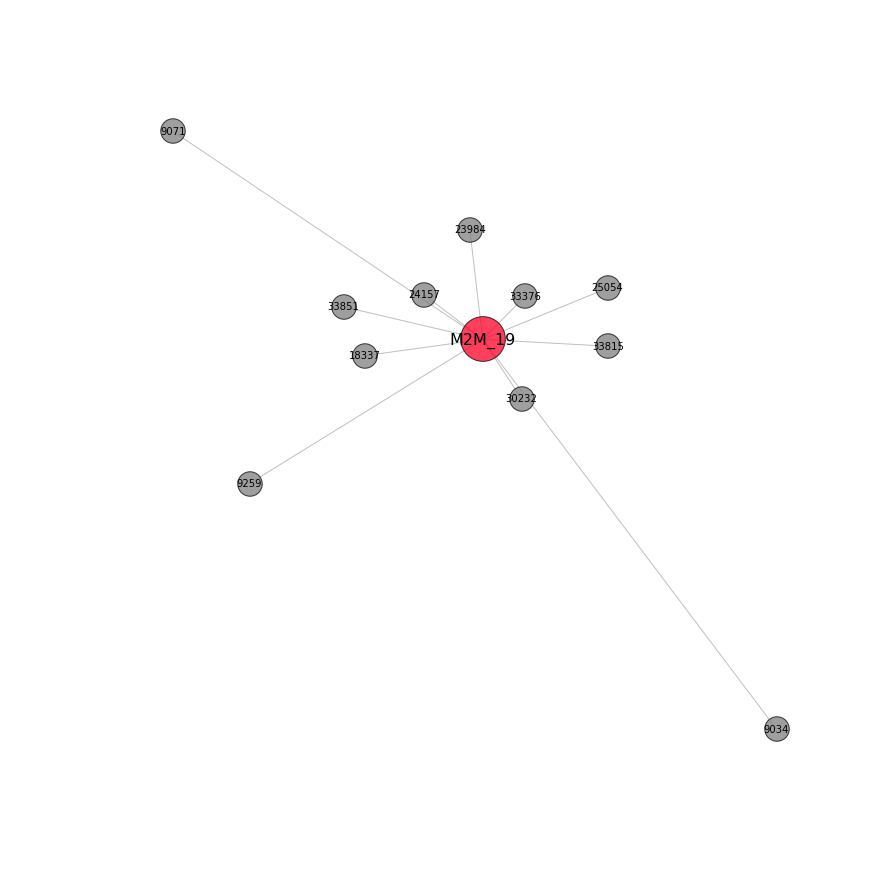

In [68]:
SG = plot_subgraph(G2, m2m_list, ms1_list, motif_idx, motif_colour)

In [72]:
nodes = SG.nodes(data=True)
node_labels_2 = {}
for node_id, node_data in nodes:
    name = node_data['name']
    words = name.split('_')
    mass = words[1]
    node_labels_2[node_id] = mass

print node_labels_2

{992: '195.11305', 1: '265.15451', 1107: '314.13861', 929: '369.11818', 711: '307.17674', 1226: '498.25994', 7: '307.09984', 1036: '194.08116', 1485: '540.33064', 1299: '194.0812', 1013: '540.27075', 855: '19'}


In [96]:
def find_match(G, ref_mass, ref_rt, mass_tol, rt_tol):
    found = None
    nodes = G.nodes(data=True)
    for node_id, node_data in nodes:    
        mass = node_data['mass']
        rt = node_data['rt']
        if abs(ref_mass-mass) < mass_tol and abs(ref_rt-rt) < rt_tol:
            found = node_id
            break
    return found

In [105]:
mass_tol = 0.03
rt_tol = 100

matching = {}
nodes = SG.nodes(data=True)
for node_id, node_data in nodes:    
    # group == 1 is a doc, 2 is a motif
    if node_data['group'] == 1:
        name = node_data['name']
        words = name.split('_')
        ref_mass = float(words[1])
        ref_mass = round(ref_mass, 3)
        ref_rt = float(words[2])
        matching_node_id = find_match(G, ref_mass, ref_rt, mass_tol, rt_tol)
        if matching_node_id is None:
            print "Nothing for %d" % node_id
        else:
            print "%s ----> %s" % (node_data, G.node[matching_node_id])
        print

Nothing for 992

{'group': 1, 'name': 'doc_265.15451_1100.58', 'in_degree': 0, 'peakid': '18337', 'score': 0, 'type': 'square', 'special': False, 'size': 10} ----> {'rt': 1031.13733333, 'stderr_rt': 44.2367469908, 'mass': 265.152}

Nothing for 929

{'group': 1, 'name': 'doc_307.17674_547.239', 'in_degree': 0, 'peakid': '24157', 'score': 0, 'type': 'square', 'special': False, 'size': 10} ----> {'rt': 556.8784375, 'stderr_rt': 48.5737621548, 'mass': 307.163}

Nothing for 1299

{'group': 1, 'name': 'doc_498.25994_615.862', 'in_degree': 0, 'peakid': '33376', 'score': 0, 'type': 'square', 'special': False, 'size': 10} ----> {'rt': 604.349, 'stderr_rt': 6.5383098224, 'mass': 498.26}

Nothing for 7

Nothing for 1036

Nothing for 1485

Nothing for 1107

{'group': 1, 'name': 'doc_540.27075_263.085', 'in_degree': 0, 'peakid': '33815', 'score': 0, 'type': 'square', 'special': False, 'size': 10} ----> {'rt': 269.987, 'stderr_rt': 13.6409356534, 'mass': 540.271}



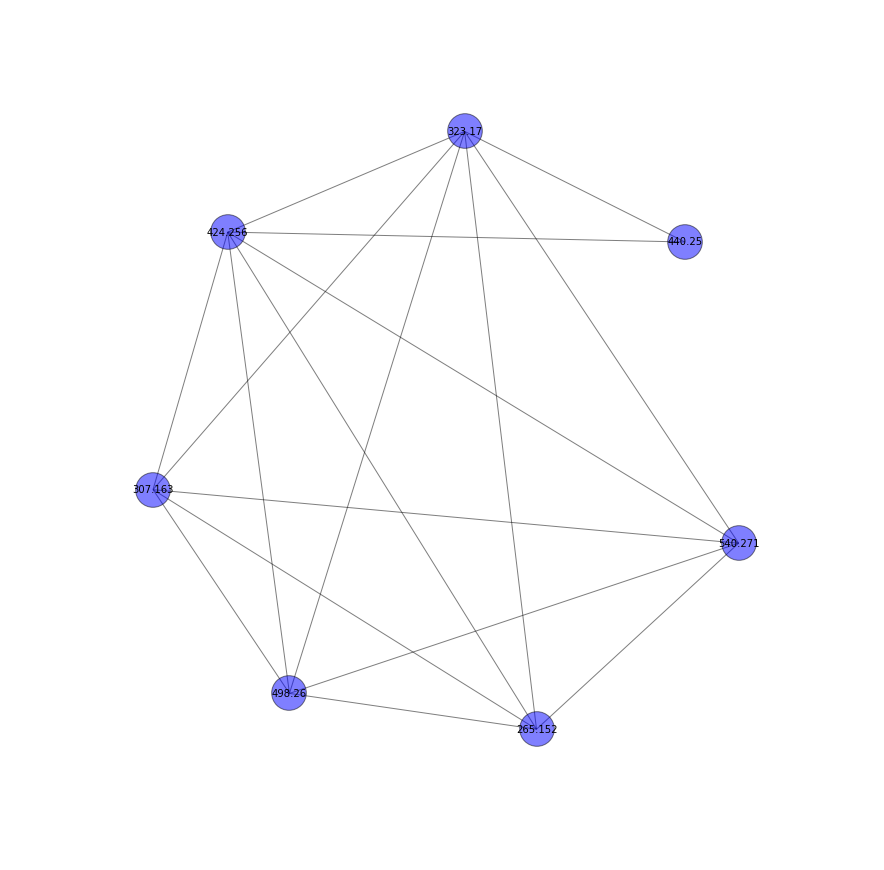

In [77]:
draw_network(G, node_labels)

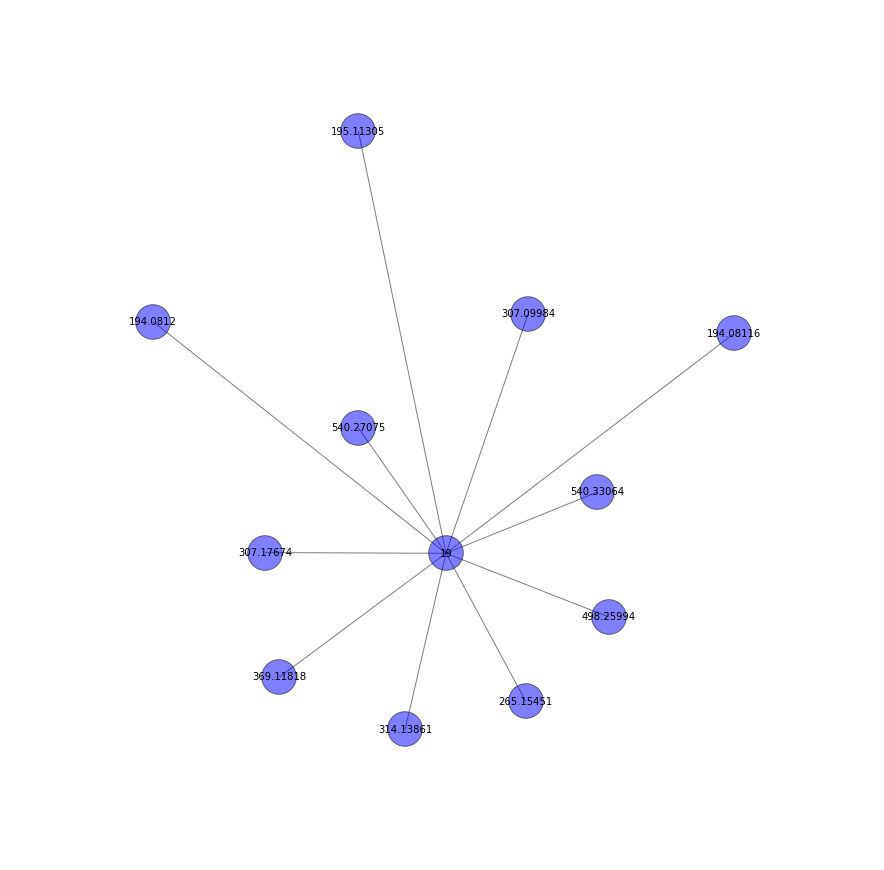

In [78]:
draw_network(SG, node_labels_2)